In [1]:
import matplotlib.pyplot as plt
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]=""

import numpy as np
import itertools

from sklearn.preprocessing import LabelBinarizer
import pandas as pd

### Import annsa modules

In [2]:
from annsa.results_plotting_functions import *

# Define simulation parameters 

In [3]:
background_dataset = pd.read_csv('../../source-interdiction/training_testing_data/background_template_dataset.csv')
source_dataset = pd.read_csv('../../source-interdiction/training_testing_data/shielded_templates_200kev_dataset.csv')

In [4]:
print('sourceheight: '+ str(sorted(set(source_dataset['sourceheight']))))
print('fwhm: '+ str(sorted(set(source_dataset['fwhm']))))
print('sourcedist: '+ str(sorted(set(source_dataset['sourcedist']))))

print('alum shieldingdensity: ' + str(sorted(set(source_dataset[source_dataset['shielding']=='alum']['shieldingdensity']))))
print('iron shieldingdensity: ' + str(sorted(set(source_dataset[source_dataset['shielding']=='iron']['shieldingdensity']))))
print('lead shieldingdensity: ' + str(sorted(set(source_dataset[source_dataset['shielding']=='lead']['shieldingdensity']))))

sourceheight: [50.0, 75.0, 100.0, 125.0, 150.0]
fwhm: [6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]
sourcedist: [50.0, 112.5, 175.0, 237.5, 300.0]
alum shieldingdensity: [1.82, 4.18, 7.49, 13.16]
iron shieldingdensity: [1.53, 3.5, 6.28, 11.02]
lead shieldingdensity: [0.22, 0.51, 0.92, 1.61]


# Simulate!

In [5]:
for shielding in ['alum', 'iron', 'lead']:

    print(set(source_dataset[source_dataset['shielding']==shielding]['fwhm']))
    print(len(source_dataset[source_dataset['shielding']==shielding]))
    

{6.0, 7.0, 8.0, 7.5, 6.5, 8.5, 9.0}
20300
{6.0, 7.0, 8.0, 7.5, 6.5, 8.5, 9.0}
20300
{6.0, 7.0, 8.0, 7.5, 6.5, 8.5, 9.0}
20300


In [35]:
sourceheights = [100.0]
# fwhms = [6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]
fwhms = [7.0]
sourcedists = [175.0]
integration_times = np.logspace(1, np.log10(3600), 20)
signal_to_backgrounds = [0.1, 0.5, 2.0]

In [36]:
for shielding in ['lead', 'iron', 'alum']:

    source_dataset_shielding = source_dataset[source_dataset['shielding']==shielding]

    shielding_densities = list(set(source_dataset[source_dataset['shielding']==shielding]['shieldingdensity']))
    
    
    spectra_dataframe_shielding = make_spectra_dataframe(source_dataset_shielding,
                                             background_dataset,
                                             total_spectra=10,
                                             sourceheight=sourceheights,
                                             sourcedist=sourcedists,
                                             fwhm=fwhms,
                                             integration_time=integration_times,
                                             signal_to_background=signal_to_backgrounds,
                                             cal_a=[0.0],
                                             cal_b=[1.0],
                                             cal_c=[0.0],
                                             background_cps=[200.0],
                                             shieldingdensity=shielding_densities)

    spectra_dataframe_shielding.to_pickle('spectra_dataframe_shielding_'+shielding)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/annsa-0.1.dev0-py3.6.egg/annsa/template_sampling.py:181: RuntimeWarning: invalid value encountered in true_divide
  source_spectrum /= np.sum(source_spectrum)  # normalizes


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/annsa-0.1.dev0-py3.6.egg/annsa/results_plotting_functions.py:262: RuntimeWarning: invalid value encountered in less
  all_spectra = np.random.poisson(all_spectra)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/annsa-0.1.dev0-py3.6.egg/annsa/results_plotting_functions.py:262: RuntimeWarning: invalid value encountered in greater
  all_spectra = np.random.poisson(all_spectra)


In [37]:
spectra_dataframe_lead = pd.read_pickle('spectra_dataframe_shielding_lead')
spectra_dataframe_iron = pd.read_pickle('spectra_dataframe_shielding_iron')
spectra_dataframe_alum = pd.read_pickle('spectra_dataframe_shielding_alum')

(0, 200)

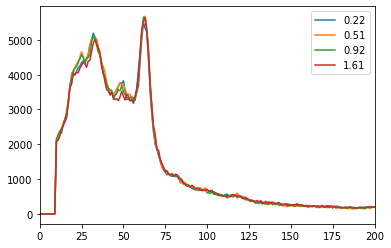

In [47]:
spectra_dataframe = spectra_dataframe_lead

for shielding_index in range(4):

    integration_time = sorted(list(set(spectra_dataframe['integration_time'])))[15]
    shielding = sorted(list(set(spectra_dataframe['shieldingdensity'])))[shielding_index]

    spectra_dataframe_tmp = spectra_dataframe[spectra_dataframe['fwhm']==7.0]
    spectra_dataframe_tmp = spectra_dataframe_tmp[spectra_dataframe_tmp['isotope']=='235U
                                                  
                                                  
                                                  
                                                  ']
    spectra_dataframe_tmp = spectra_dataframe_tmp[spectra_dataframe_tmp['signal_to_background']==0.5]
    spectra_dataframe_tmp = spectra_dataframe_tmp[spectra_dataframe_tmp['integration_time']==integration_time]
    spectra_dataframe_tmp = spectra_dataframe_tmp[spectra_dataframe_tmp['shieldingdensity']==shielding]
    
    plt.plot(spectra_dataframe_tmp['spectrum'].values[0], label=shielding)

# plt.semilogy()
plt.legend()
plt.xlim([0,200])

(0, 200)

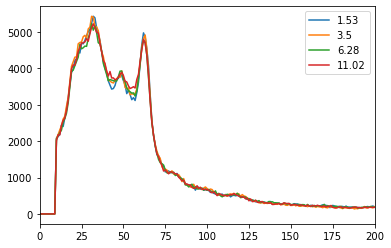

In [42]:
spectra_dataframe = spectra_dataframe_iron

for shielding_index in range(4):

    integration_time = sorted(list(set(spectra_dataframe['integration_time'])))[15]
    shielding = sorted(list(set(spectra_dataframe['shieldingdensity'])))[shielding_index]

    spectra_dataframe_tmp = spectra_dataframe[spectra_dataframe['fwhm']==7.0]
    spectra_dataframe_tmp = spectra_dataframe_tmp[spectra_dataframe_tmp['isotope']=='235U']
    spectra_dataframe_tmp = spectra_dataframe_tmp[spectra_dataframe_tmp['signal_to_background']==0.5]
    spectra_dataframe_tmp = spectra_dataframe_tmp[spectra_dataframe_tmp['integration_time']==integration_time]
    spectra_dataframe_tmp = spectra_dataframe_tmp[spectra_dataframe_tmp['shieldingdensity']==shielding]
    
    plt.plot(spectra_dataframe_tmp['spectrum'].values[0], label=shielding)

# plt.semilogy()
plt.legend()
plt.xlim([0,200])

(0, 200)

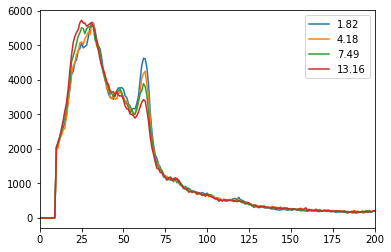

In [43]:
spectra_dataframe = spectra_dataframe_alum

for shielding_index in range(4):

    integration_time = sorted(list(set(spectra_dataframe['integration_time'])))[15]
    shielding = sorted(list(set(spectra_dataframe['shieldingdensity'])))[shielding_index]

    spectra_dataframe_tmp = spectra_dataframe[spectra_dataframe['fwhm']==7.0]
    spectra_dataframe_tmp = spectra_dataframe_tmp[spectra_dataframe_tmp['isotope']=='235U']
    spectra_dataframe_tmp = spectra_dataframe_tmp[spectra_dataframe_tmp['signal_to_background']==0.5]
    spectra_dataframe_tmp = spectra_dataframe_tmp[spectra_dataframe_tmp['integration_time']==integration_time]
    spectra_dataframe_tmp = spectra_dataframe_tmp[spectra_dataframe_tmp['shieldingdensity']==shielding]
    
    plt.plot(spectra_dataframe_tmp['spectrum'].values[0], label=shielding)

# plt.semilogy()
plt.legend()
plt.xlim([0,200])